For an article on A/B testing that I am preparing, I asked my partner Dr. Nina Zumel if she could do me a favor and write some code to produce the diagrams. She prepared [an excellent parameterized diagram generator](https://github.com/WinVector/Examples/blob/main/calling_R_from_Python/significance_power_visuals.R). However being the author of the book [Practical Data Science with R](https://www.manning.com/books/practical-data-science-with-r-second-edition), she built it in [`R`](https://www.r-project.org) using [ggplot2](https://CRAN.R-project.org/package=ggplot2). This would be great, except the A/B testing article is being developed in Python, as it targets programmers familiar with Python.

As the production of the diagrams is not part of the proposed article, I decided to use the [`rpy2` package](https://rpy2.github.io) to integrate the `R` diagrams directly into the new worksheet. Alternatively, I could translate her code into Python using one of: [Seaborn objects](https://seaborn.pydata.org/tutorial/objects_interface.html), [plotnine](https://plotnine.readthedocs.io/en/v0.12.3/), [ggpy](https://github.com/yhat/ggpy), or others. The large number of options is evidence of how influential Leland Wilkinson's grammar of graphics (gg) is. 

Let's try the `rpy2` approach.

For our example we import our modules, including a small adaptor I wrote called [`r_tools`](https://github.com/WinVector/Examples/blob/main/calling_R_from_Python/r_tools.py).

In [1]:
# import our modules
import numpy as np
from IPython.display import Code, display, Image
from rpy2 import robjects
from r_tools import get_ggplot_fn_by_name
import pandas as pd

Now all we have to do use her code is:

  1) Source her `.R` file to load the function.
  2) Get a reference to the diagram producing function.

This is done as follows.

In [2]:
# read the .R file into the R interpreter environment
robjects.r("source('significance_power_visuals.R')")
# get a Python reference to the sig_pow_visuals R function
sig_pow_visuals = get_ggplot_fn_by_name("sig_pow_visuals")

Now we can use the diagram code. What the A/B testing diagram is and how to pick the arguments will be the content of our later article. The thing to notice now is: we generate the diagram from the `R` code, working in `Python`.

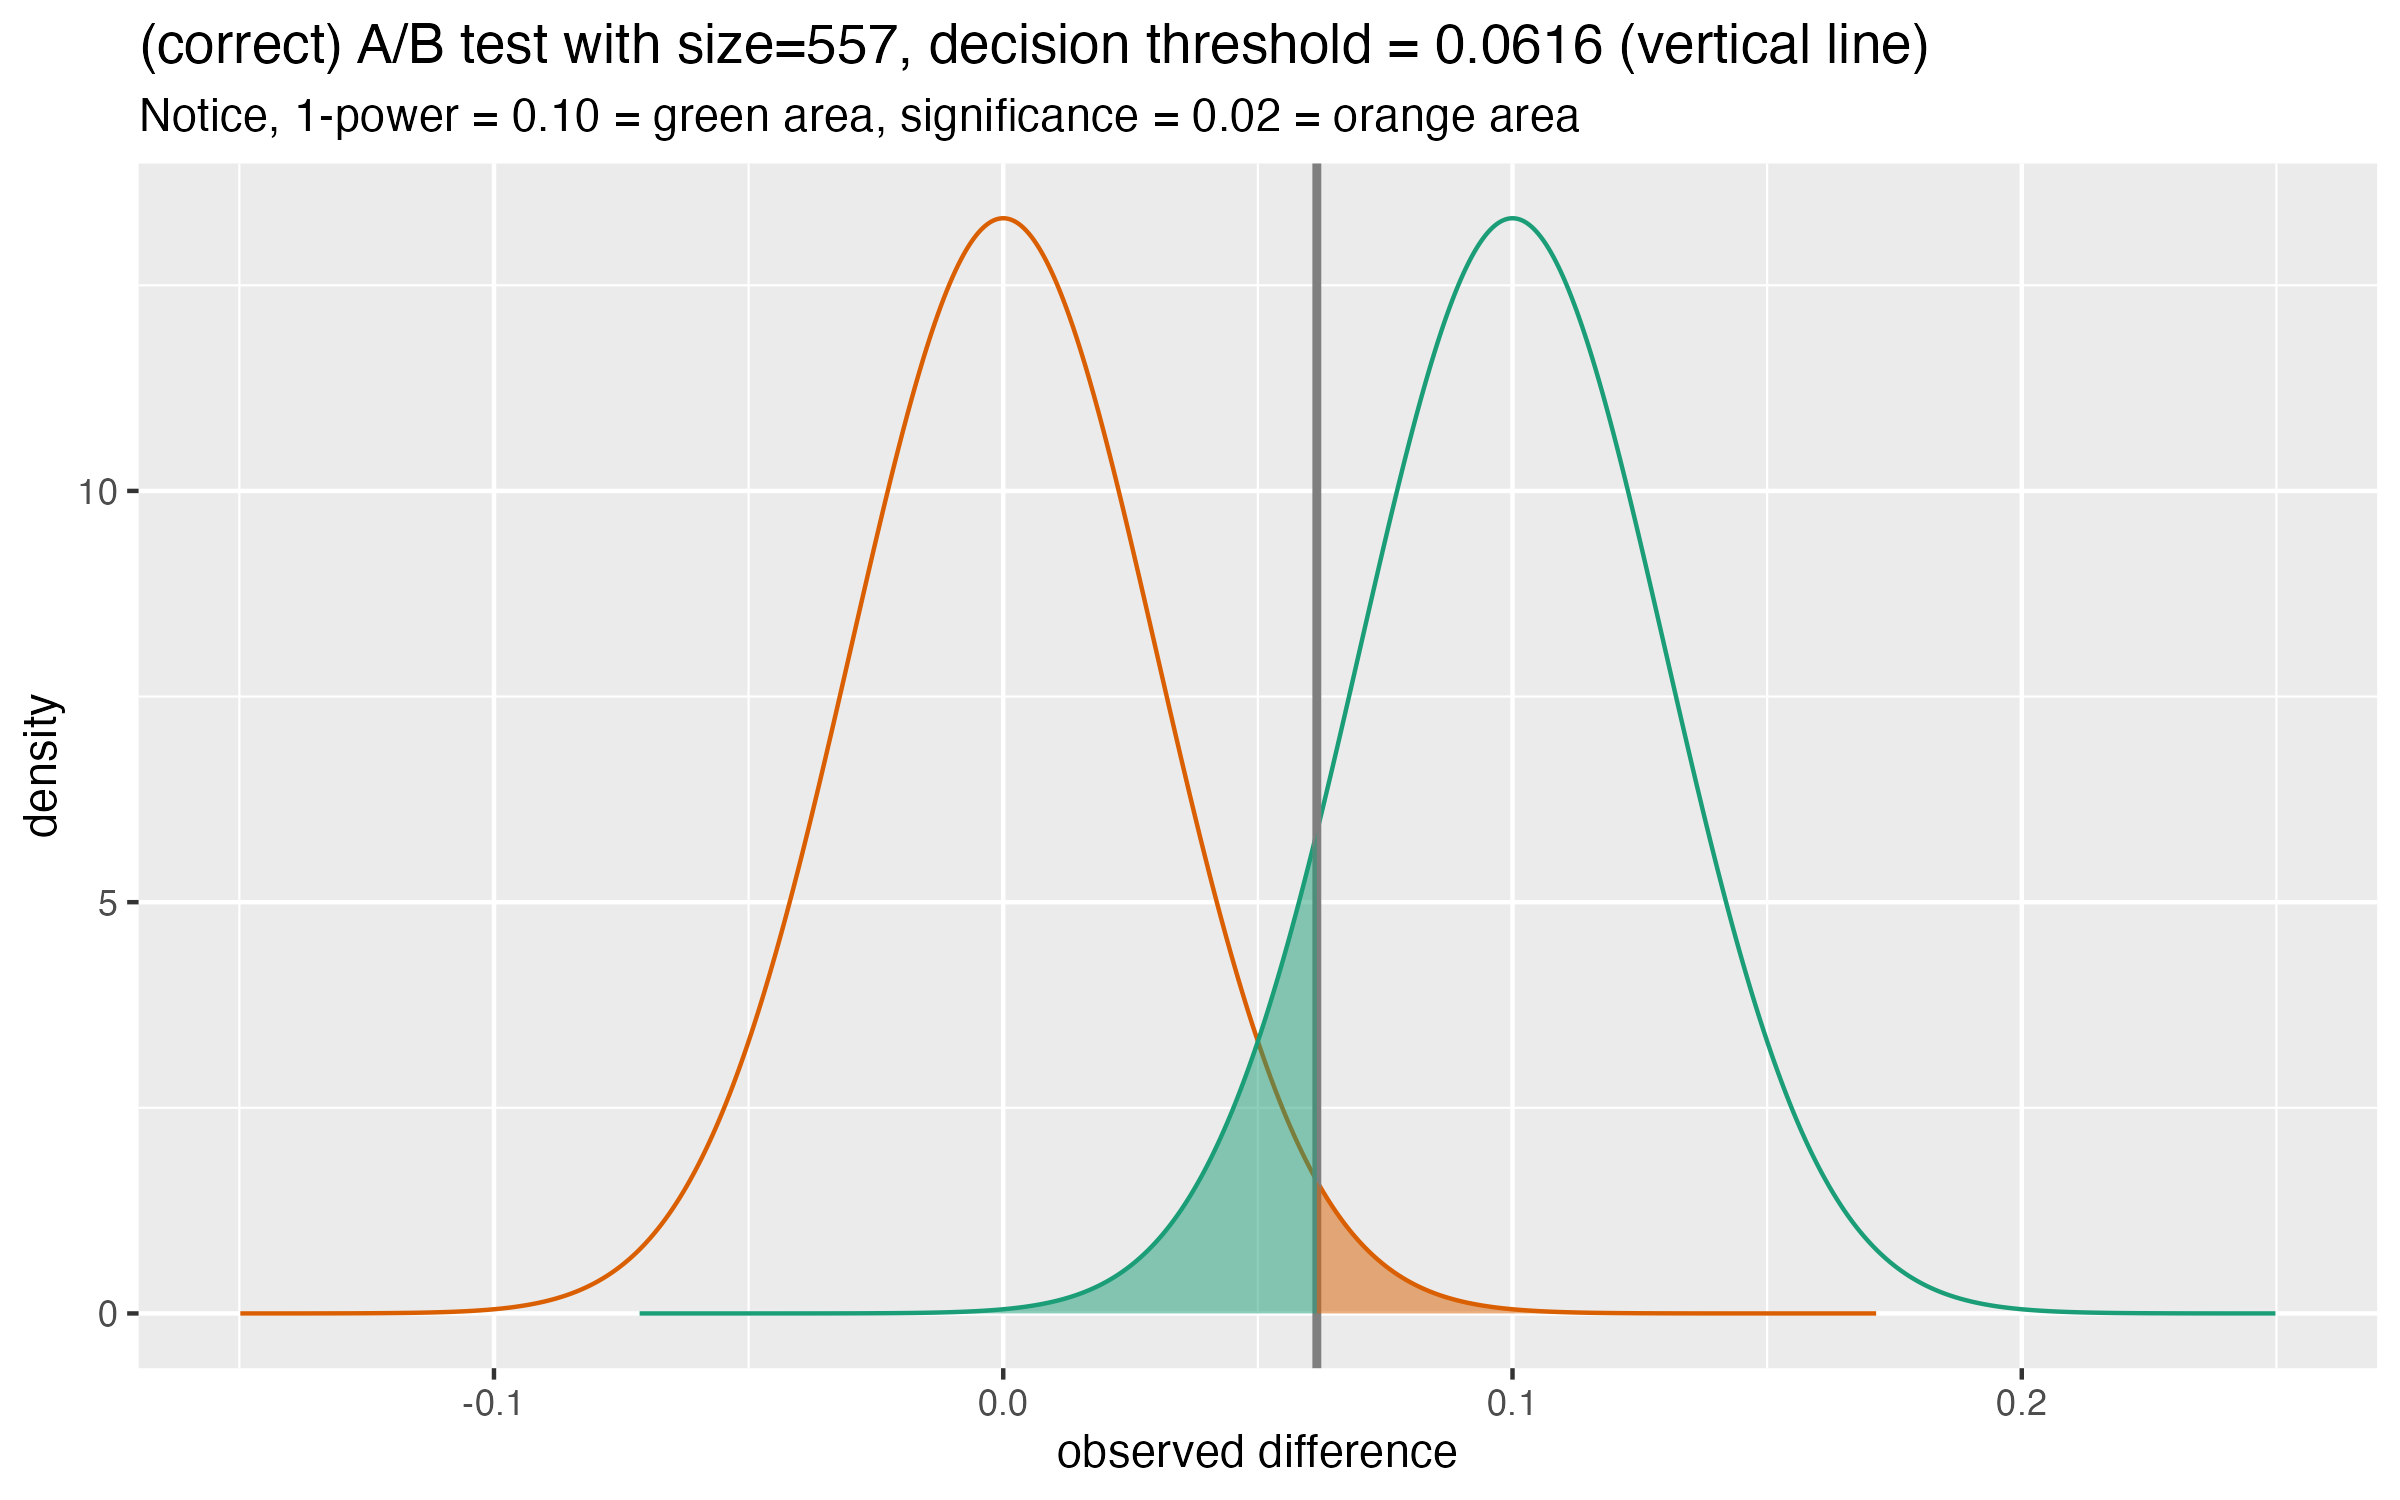

In [3]:
# make the example diagram
n = 557
r = 0.1
t = 0.061576
power = 0.9
significance = 0.02

display(sig_pow_visuals(
  stdev=np.sqrt(0.5 / n), 
  effect_size=r, 
  threshold=t,
  title=f"(correct) A/B test with size={n}, decision threshold = {t:.4f} (vertical line)",
  subtitle=f"Notice, 1-power = {1-power:.2f} = green area, significance = {significance:.2f} = orange area"
))

For the above to work, one must have an installed `R` environment (with the appropriate packages) and a properly installed and configured `rpy2`. 

The above example is a bit unusual, in that it is a plot that doesn't take an incoming data frame as an argument. More often we are likely wanting to pass a `Pandas` data frame into `R`. This is also quite easy.

To see this, consider [another `.R` file](https://github.com/WinVector/Examples/blob/main/calling_R_from_Python/plot_frame.R) that defines the following R function.

In [4]:
# show the contents of a .R file
display(Code("plot_frame.R", language="R"))

library(ggplot2)


plt_frame <- function(d) {
  ggplot(data = d, mapping = aes(x = x, y = y)) +
    geom_point()
}

We can source this `.R` file and get a reference to the desired function as before.

In [5]:
robjects.r("source('plot_frame.R')")
plt_frame = get_ggplot_fn_by_name(
    "plt_frame",
    # ggplot2::ggsave() arguments
    width=3,
    height=2,
    units="in",
)

With the function reference in hand, we can now plot.

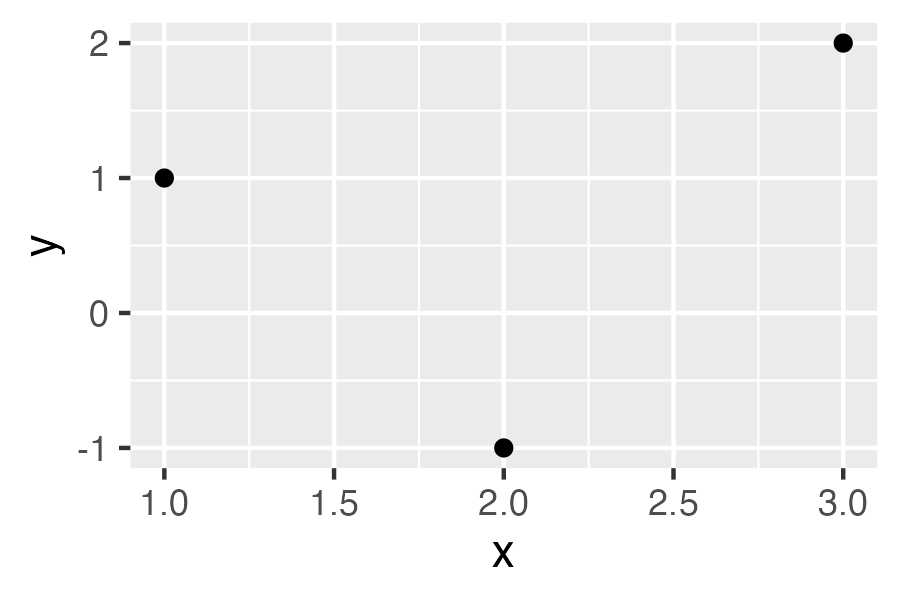

In [6]:
display(plt_frame(
    pd.DataFrame({
        "x": [1.0, 2.0, 3.0],
        "y": [1.0, -1.0, 2.0],
})))

The adapter also adds some minimal function help (source file name and names of arguments).

In [7]:
help(plt_frame)

Help on function plt_frame in module r_tools:

plt_frame(*args, **kwargs) -> IPython.core.display.Image
    imported R function plt_frame() (assumed to return a ggplot)
     wrapped fn returns IPython.display.Image
    R source file: plot_frame.R
    R definition environment: <environment: R_GlobalEnv>
    R arguments:
    $d



And that is one method to use `R` graphing in Python or mixed-language data science projects. 

All of the code in this example can be found [here](https://github.com/WinVector/Examples/tree/main/calling_R_from_Python).